# Reports
1. Inputs: analytics and metrics
2. Outputs: results and conclusions
3. ...

**API de requests para predições hospedada no Heroku através do link:**

https://insurance-sales-predict.herokuapp.com/predict

Orientações para o request: 
1. Dataframe raw integral contendo index e Response (deve conter Response apenas por conta de estudos de métricas)
2. Mínimo de duas amostras
3. Formato json com orient do tipo records

**API de requests de predições hospedada no Heroku através do link** - 

https://insurance-sales-predict.herokuapp.com/predict

Orientações para o request: 
1. Dataframe raw integral contendo index e response (apenas para estudo)
2. Mínimo de duas amostras
3. Formato json com orient do tipo records

# 1.0 Context

## 1.1 Contexto:
A Insurance All é uma empresa que fornece seguro de saúde para seus clientes e o time de produtos está analisando a possibilidade de oferecer aos assegurados, um novo produto: Um seguro de automóveis.

Assim como o seguro de saúde, os clientes desse novo plano de seguro de automóveis precisam pagar um valor anualmente à Insurance All para obter um valor assegurado pela empresa, destinado aos custos de um eventual acidente ou dano ao veículo.

A Insurance All fez uma pesquisa com cerca de 380 mil clientes sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

O time de produtos selecionou 127 mil novos clientes que não responderam a pesquisa para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.

Projeto retirado do Blog Seja Um Data Scientist
https://sejaumdatascientist.com/como-usar-data-science-para-fazer-a-empresa-vender-mais/

Projeto original disponível na plataforma Kaggle
https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction


## 1.2 Estratégia da Solução:

###### 1.2.1 Objetivos:
1. Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.
2. Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
3. E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
4. Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

###### 1.2.2 Proposta de Solução:
1. Gráficos e estudos de como as features se relacionam com a variávei alvo, individualmente ou combinadas através de Exploratory Data Analysis e Descriptive Statistics.
2. Treinar um modelo de Machine Learning, scorar os clientes, priorizar os clientes segundo suas probabilidades de sucesso, utilizar das métricas para criar cenários com os 20.000 melhores.
3. Utilizar do modelo anterior e criar cenários com os 40.000 melhores.
4. Utilizar do modelo anterior, definir curva de probabilidades para todos os clientes e identificar ponto crítico.
5. Fazer deploy e disponibilizar online através do Heroku

###### 1.2.3 Inputs:
1. Problema de negócio
2. Conjunto de dados com características de 380.000 clientes e as suas respostas sobre interesse em adquirir um seguro de automóveis.

###### 1.2.4 Outputs:
1. Gráficos e parâmetros em uma tabela no notebook (Gráfico / Parâmetros)
2. Resposta objetiva em um notebook (Uma porcentagem)
3. Resposta objetiva em um notebook (Uma porcentagem)
4. Resposta objetiva em um notebook (Um número absoluto)
5. Tabela de banco de dados SQL com todas as classificações
6. API com request/predict do tipo: | v1 | v2 | v3 | vn - 1/0

###### 1.2.5 Ciclos:
1. Pipeline de dados, funcional, de ponta a ponta (desde a coleta de dados até o 
    treinamento do modelo)
2. Entender os dados e limpa-los (buscar inconsistências) Análises de estatística
    descritiva de primeira ordem
3. Feature Engineering (criar variáveis que modelam o fenômeno)
4. Criar as hipóteses de negócio
5. Análise exploratória de dados para validar ou refutar hióteses
6. Definir métricas e treinar o modelo
7. Analisar métricas
8. Criar arquivo handle para todas as transformações necessárias
9. Criar API
10. Resultados e Conclusão

## 1.3 Sumário:

# 2.0 Imports

###### 2.1 Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

import time
import warnings

# Tempo de processamento
time_agora = time.time()

###### 2.2 Loading dataset

In [2]:
# raw data
train = pd.read_csv('D:\\My Drive\\Pessoal\\Projetos\\insurance_sales_predict\\insurance_sales_predict\\train.csv')
test = pd.read_csv('D:\\My Drive\\Pessoal\\Projetos\\insurance_sales_predict\\insurance_sales_predict\\test.csv')
df = pd.concat([train, test])

# processed data
df_predict_request = pickle.load(open('D:\\My Drive\\Pessoal\\Projetos\\insurance_sales_predict\\insurance_sales_predict\\exportings\\df_predict_request.pkl', 'rb'))

# columns
model_columns = pickle.load(open('D:\\My Drive\\Pessoal\\Projetos\\insurance_sales_predict\\insurance_sales_predict\\exportings\\model_columns.pkl', 'rb'))

# Feature selection
feature_selection = pickle.load(open('D:\\My Drive\\Pessoal\\Projetos\\insurance_sales_predict\\insurance_sales_predict\\exportings\\ranking_feature_selection.pkl', 'rb'))

# 3.0 Baseline

In [3]:
baseline = train['Response'].mean()
print(f'A média atual de interesse no produto é igual a {round(baseline, 2)*100}%')

A média atual de interesse no produto é igual a 12.0%


# 4.0 Metrics

Modelo XGRFBoost: PRECISION de 0.27, RECALL de 0.94 e ROC_AUC 0.80

# 5.0 Business Problems

### 5.1 Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.

**Gender:** Homens se interessam 30% mais no produto em relação às mulheres

**Vehicle_Damage:** Clientes que já tiveram danos no seu veículo tem 24% de eventos positivos, enquanto clientes que não tiveram danos têm por volta de 1%

**Driving_License:** Habilitados apresentam 5% de interesse no produto, não habilitados apresentam 12%

**Previously_Insured:** Clientes que já possuem seguro têm interesse quase zero pelo produto

**Region_Code:** 28% dos clientes está contido na região 28, região mais numerosa, que tem por volta de 18% de interesse no produto, interesse 50% maior do que a média global

**Policy_Sales_Channel:** Os canais mais utilizados apresentam médias de response bastante diferentes da média global, o canal 152 é o mais utilizado e apresenta 2% de interesse no produto, o canal 155 apresenta 2%, já os canais 26, 124 e 156 apresentam por volta de 20% de interesse no produto

**Age:** A média de idade entre os que não se interessam pelo produto é de 38 anos, e dos que se interessam é de 43 anos.

<AxesSubplot:>

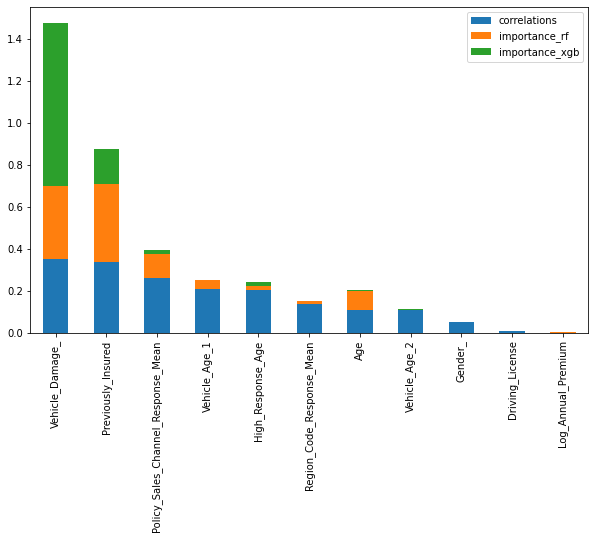

In [4]:
feature_selection[['correlations', 'importance_rf', 'importance_xgb']].sort_values('correlations', ascending=False).plot(kind='bar', figsize=(10, 6), stacked=True)

### 5.2 Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?

In [5]:
feature_selection

,correlations,rfe_xgb,importance_rf,importance_xgb,boruta
Age,0.111147,1,0.088867,0.007395,1
Driving_License,0.010155,7,0.000000,0.002029,2
Previously_Insured,0.341170,6,0.368603,0.168569,1
Gender_,0.052440,5,0.001385,0.000586,1
Vehicle_Damage_,0.354400,3,0.344469,0.778970,1
Policy_Sales_Channel_Response_Mean,0.263429,1,0.112754,0.020186,1
Region_Code_Response_Mean,0.138095,1,0.016146,0.001772,1
High_Response_Age,0.205981,4,0.020214,0.017764,1
Log_Annual_Premium,0.002707,2,0.002531,0.000165,1
Vehicle_Age_1,0.209878,1,0.042560,0.000230,1


#### 6.1 Premissas

In [6]:
request_20000 = df_predict_request.sort_values('probability', ascending=False).head(20000)

print(classification_report(request_20000['Response'], request_20000['predictions'], zero_division=0))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79       437
           1       0.27      0.84      0.41        63

    accuracy                           0.69       500
   macro avg       0.62      0.76      0.60       500
weighted avg       0.88      0.69      0.75       500



#### 6.2 Calculos

### 5.3 E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?

#### 7.1 Premissas

#### 7.2 Calculos

### 5.4 Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

#### 8.1 Premissas

#### 8.2 Calculos

# Time

In [7]:
print(f'O tempo de processamento do projeto foi de: {int(round(time.time()-time_agora, 2)/60)} minutos')

O tempo de processamento do projeto foi de: 0 minutos
